# T2 map calculation tutorial

Start by importing the required libraries and defining some settings:

In [20]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.mapping.t2 import T2

# Ensure figures are rendered in the notebook
%matplotlib inline


Tell python where to store the T2 maps NIfTI files we will generate. We will store it in a directory called `t2_calculation_output` in the `tutorials` directory.

In [21]:
# Initialise output path for T2star map
OUTPUT_DIR = os.path.join(os.getcwd(), "t2_calculation_output")
OUTPUT_PATH = os.path.join(OUTPUT_DIR, 'T2Map.nii.gz')


Retrieve T2 test data using our data fetcher.
This will return 3 variables:
* `image`: a 4D array with the magnitude data at all echo times.
* `affine`: the affine matrix for the data (needed to later write a new NIfTI file).
* `te`: an array containing the echo times, in seconds.

In [22]:
# Fetch test data
image, affine, te = fetch.t2_philips(1)
te = te * 1000  # convert TE to ms

Compute the T2 maps using the `T2` class implemented in `mapping`.

In [23]:
# Initialise the mapping object
mapper = T2(image, te)

# Extract the T2 map from the object
t2_map = mapper.t2_map

100%|██████████| 46080/46080 [01:36<00:00, 475.34it/s] 


Display a central slice of the T2 map and derived measures.

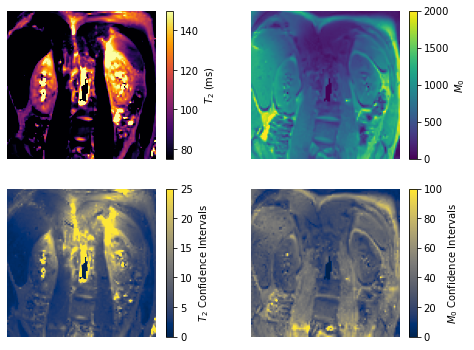

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

# Display a central slice of the T2 map
im = ax[0, 0].imshow(np.rot90(t2_map[:, :, 2]), cmap='inferno', clim=(75, 150))
cb = fig.colorbar(im, ax=ax[0, 0])
cb.set_label('$T_2$ (ms)')
ax[0, 0].axis('off')

# Display a central slice of the M0 map
im = ax[0, 1].imshow(np.rot90(mapper.m0_map[:, :, 2]), cmap='viridis', clim=(0, 2000))
cb = fig.colorbar(im, ax=ax[0, 1])
cb.set_label('$M_0$')
ax[0, 1].axis('off')

# Display a central slice of the T2 confidence intervals
im = ax[1, 0].imshow(np.rot90(mapper.t2_err[:, :, 2]), cmap='cividis', clim=(0, 25))
cb = fig.colorbar(im, ax=ax[1, 0])
cb.set_label('$T_2$ Confidence Intervals')
ax[1, 0].axis('off')

# Display a central slice of the M0 confidence intervals
im = ax[1, 1].imshow(np.rot90(mapper.m0_err[:, :, 2]), cmap='cividis', clim=(0, 100))
cb = fig.colorbar(im, ax=ax[1, 1])
cb.set_label('$M_0$ Confidence Intervals')
ax[1, 1].axis('off')

plt.show()

Now we'll save the resulting T2 map as a NIfTI files:

In [27]:
t2_nifti_object = nib.Nifti1Image(t2_map, affine=affine)
nib.save(t2_nifti_object, OUTPUT_PATH)